# Parte 1 

Este Notebook comprueba que el codigo en la tarea 2 utilizando Python2 Funciona correctamente.

In [1]:
import urllib
import pandas as pd
train_data_url = "http://statweb.stanford.edu/~hastie/ElemStatLearn/datasets/vowel.train"
test_data_url = "http://statweb.stanford.edu/~hastie/ElemStatLearn/datasets/vowel.test"
train_data_f = urllib.urlretrieve(train_data_url, "train_data.csv")
test_data_f = urllib.urlretrieve(test_data_url, "test_data.csv")
train_df = pd.DataFrame.from_csv('train_data.csv',header=0,index_col=0)
test_df = pd.DataFrame.from_csv('test_data.csv',header=0,index_col=0)
train_df.head()
test_df.tail()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
458,7,-3.239,3.083,-1.427,-0.202,-0.282,1.421,0.576,0.068,-0.914,0.147
459,8,-3.753,3.605,-0.899,-0.747,-0.401,1.765,0.620,0.754,-0.835,-0.301
460,9,-3.980,2.459,0.068,0.023,0.237,1.029,-0.189,0.521,-0.773,-0.500
461,10,-4.264,2.925,0.065,0.794,0.323,0.515,-1.282,-0.140,-0.863,-0.390
462,11,-3.291,2.324,-0.679,0.285,0.441,0.557,-0.227,0.115,-1.046,0.697


In [2]:
from sklearn.preprocessing import StandardScaler
X = train_df.loc[:,'x.1':'x.10'].values
y = train_df.loc[:,'y'].values
Scaler = StandardScaler().fit(X)
X_std = Scaler.transform(X)

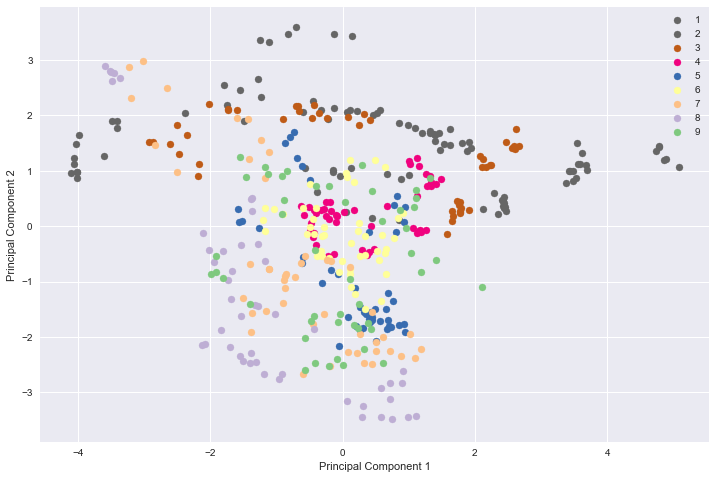

In [3]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns 
import numpy as np
sklearn_pca = PCA(n_components=2)
Xred_pca = sklearn_pca.fit_transform(X_std)
cmap = plt.cm.get_cmap('Accent_r')
mclasses=(1,2,3,4,5,6,7,8,9)
mcolors = [cmap(i) for i in np.linspace(0,1,10)]
plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_pca[y==lab, 0],Xred_pca[y==lab, 1],label=lab,c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

C:\Users\Pablo\Anaconda2\lib\site-packages\sklearn\lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


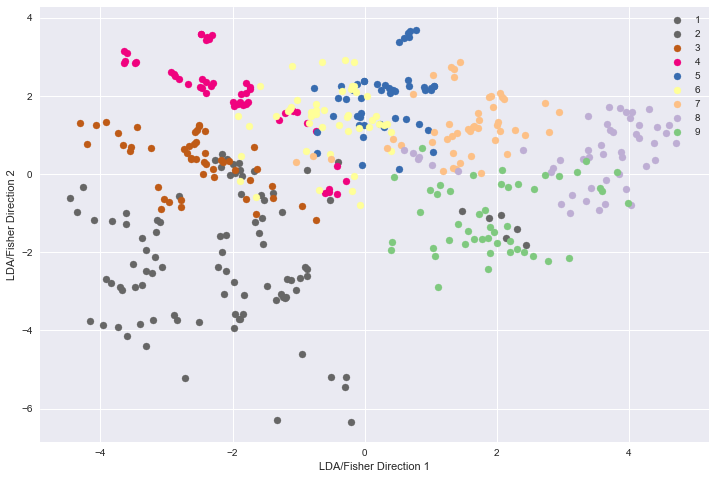

In [4]:
from sklearn.lda import LDA
sklearn_lda = LDA(n_components=2)
Xred_lda = sklearn_lda.fit_transform(X_std,y)
cmap = plt.cm.get_cmap('Accent_r')
mclasses=(1,2,3,4,5,6,7,8,9)
mcolors = [cmap(i) for i in np.linspace(0,1,10)]
plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_lda[y==lab, 0],Xred_lda[y==lab, 1],label=lab,
                c=col)
plt.xlabel('LDA/Fisher Direction 1')
plt.ylabel('LDA/Fisher Direction 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

C:\Users\Pablo\Anaconda2\lib\site-packages\sklearn\qda.py:6: DeprecationWarning: qda.QDA has been moved to discriminant_analysis.QuadraticDiscriminantAnalysis in 0.17 and will be removed in 0.19.
  "in 0.17 and will be removed in 0.19.", DeprecationWarning)


-----LDA-----
0.683712121212
0.443722943723
-----QDA-----
0.988636363636
0.471861471861
-----KNN-----


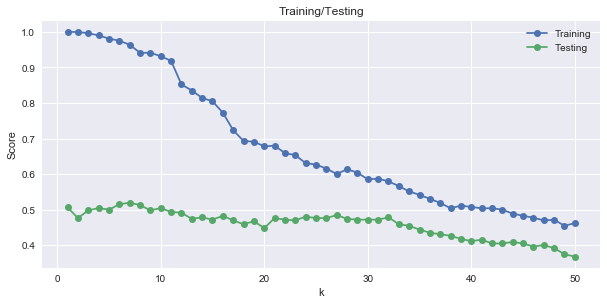

In [5]:
from sklearn.lda import LDA
from sklearn.qda import QDA
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
Xtest = test_df.loc[:,'x.1':'x.10'].values
ytest = test_df.loc[:,'y'].values
X_std_test = Scaler.transform(Xtest)
lda_model = LDA()
lda_model.fit(X_std,y)
print "-----LDA-----"
print lda_model.score(X_std,y)
print lda_model.score(X_std_test,ytest)
qda_model = QDA()
qda_model.fit(X_std,y)
print "-----QDA-----"
print qda_model.score(X_std,y)
print qda_model.score(X_std_test,ytest)
print "-----KNN-----"
knn_scores_training = []
knn_scores_testing = []
k = range(1,51)
for c in k:
	knn_model = KNeighborsClassifier(n_neighbors=c)
	knn_model.fit(X_std,y)
	knn_scores_training.append(knn_model.score(X_std,y))
	knn_scores_testing.append(knn_model.score(X_std_test,ytest))
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.xlabel("k")
plt.ylabel("Score")
plt.title("Training/Testing")
plt.plot(k,knn_scores_training, '-o',k,knn_scores_testing, '-o')
plt.legend(("Training", "Testing"), loc = "upper right")
plt.show()

# Parte 2

In [6]:
train_data_url = "http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.train"
test_data_url = "http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.dev"
train_data_f = urllib.urlretrieve(train_data_url, "train_data.csv")
test_data_f = urllib.urlretrieve(test_data_url, "test_data.csv")
ftr = open("train_data.csv", "r")
fts = open("test_data.csv", "r")
rows = [line.split(" ",1) for line in ftr.readlines()]
train_df = pd.DataFrame(rows, columns=['Sentiment','Text'])
train_df['Sentiment'] = pd.to_numeric(train_df['Sentiment'])
rows = [line.split(" ",1) for line in fts.readlines()]
test_df = pd.DataFrame(rows, columns=['Sentiment','Text'])
test_df['Sentiment'] = pd.to_numeric(test_df['Sentiment'])
print train_df.shape
print test_df.shape

(3554, 2)
(3554, 2)


In [7]:
import re, time     
from nltk.corpus import stopwords   
from nltk import WordNetLemmatizer, word_tokenize
from nltk.stem.porter import PorterStemmer
def word_extractor(text):
	ps = PorterStemmer()
	commonwords = stopwords.words('english')
	text = re.sub(r'([a-z])\1+', r'\1\1',text)#substitute multiple letter by two
	words = ""
	wordtokens = [ ps.stem(word.lower()) \
				for word in word_tokenize(text.decode('utf-8', 'ignore')) ]
	for word in wordtokens: 
		if word not in commonwords:
				words+=" "+word	
	return words
print word_extractor("I love to eat cake")
print word_extractor("I love eating cake")
print word_extractor("I loved eating the cake")
print word_extractor("I do not love eating cake")
print word_extractor("I don't love eating cake")

 love eat cake
 love eat cake
 love eat cake
 love eat cake
 n't love eat cake


In [8]:
def word_extractor2(text):
	wordlemmatizer = WordNetLemmatizer()
	commonwords = stopwords.words('english')
	text = re.sub(r'([a-z])\1+', r'\1\1',text)#substitute multiple letter by two
	words = ""
	wordtokens = [ wordlemmatizer.lemmatize(word.lower()) \
				for word in word_tokenize(text.decode('utf-8','ignore')) ]
	for word in wordtokens: 
		if word not in commonwords:
				words+=" "+word	
	return words
print word_extractor2("I love to eat cake")
print word_extractor2("I love eating cake")
print word_extractor2("I loved eating the cake")
print word_extractor2("I do not love eating cake")
print word_extractor2("I don't love eating cake")

 love eat cake
 love eating cake
 loved eating cake
 love eating cake
 n't love eating cake


In [19]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer 
texts_train = [word_extractor2(text) for text in train_df.Text]
texts_test = [word_extractor2(text) for text in test_df.Text]
vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer.fit(np.asarray(texts_train))
features_train = vectorizer.transform(texts_train)
features_test = vectorizer.transform(texts_test)
labels_train = np.asarray((train_df.Sentiment.astype(float)+1)/2.0)
labels_test = np.asarray((test_df.Sentiment.astype(float)+1)/2.0)	
vocab = vectorizer.get_feature_names()
dist=list(np.array(features_train.sum(axis=0)).reshape(-1,))
#for tag, count in zip(vocab, dist):
    #print count, tag


In [10]:
from sklearn.metrics import classification_report
def score_the_model(model,x,y,xt,yt,text):
	acc_tr = model.score(x,y)
	acc_test = model.score(xt[:-1],yt[:-1])
	print "Training Accuracy %s: %f"%(text,acc_tr)
	print "Test Accuracy %s: %f"%(text,acc_test)
	print "Detailed Analysis Testing Results ..."
	print(classification_report(yt, model.predict(xt), target_names=['+','-']))

In [11]:
from sklearn.naive_bayes import BernoulliNB
import random
def do_NAIVE_BAYES(x,y,xt,yt):
	model = BernoulliNB()
	model = model.fit(x, y)
	score_the_model(model,x,y,xt,yt,"BernoulliNB")
	return model
model=do_NAIVE_BAYES(features_train,labels_train,features_test,labels_test)
test_pred = model.predict_proba(features_test)
spl = random.sample(xrange(len(test_pred)), 15)
for text, sentiment in zip(test_df.Text[spl], test_pred[spl]):
    print sentiment, text

Training Accuracy BernoulliNB: 0.958638
Test Accuracy BernoulliNB: 0.738531
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.75      0.73      0.74      1803
          -       0.73      0.75      0.74      1751

avg / total       0.74      0.74      0.74      3554

[ 0.61479813  0.38520187] the script isn't very good ; not even someone as gifted as hoffman ( the actor ) can make it work .

[ 0.02228968  0.97771032] droll caper-comedy remake of " big deal on madonna street " that's a sly , amusing , laugh-filled little gem in which the ultimate " bellini " begins to look like a " real kaputschnik . "

[ 0.87429056  0.12570944] fans of so-bad-they're-good cinema may find some fun in this jumbled mess .

[ 0.80728908  0.19271092] what time is it there ? is not easy . it haunts you , you can't forget it , you admire its conception and are able to resolve some of the confusions you had while watching it .

[  2.03527339e-04   9.

In [12]:
from sklearn.svm import LinearSVC
def do_SVM(x,y,xt,yt):
	Cs = [0.01,0.1,10,100,1000]
	for C in Cs:
		print "El valor de C que se esta probando: %f"%C
		model = LinearSVC(C=C)
		model = model.fit(x, y)
		score_the_model(model,x,y,xt,yt,"SVM")
do_SVM(features_train,labels_train,features_test,labels_test)

El valor de C que se esta probando: 0.010000
Training Accuracy SVM: 0.884637
Test Accuracy SVM: 0.715170
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.72      0.72      0.72      1803
          -       0.71      0.71      0.71      1751

avg / total       0.72      0.72      0.72      3554

El valor de C que se esta probando: 0.100000
Training Accuracy SVM: 0.989589
Test Accuracy SVM: 0.723614
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.73      0.72      0.73      1803
          -       0.72      0.73      0.72      1751

avg / total       0.72      0.72      0.72      3554

El valor de C que se esta probando: 10.000000
Training Accuracy SVM: 1.000000
Test Accuracy SVM: 0.702786
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.71      0.69      0.70      1803
          -       0.69      0.71 

# Parte 3

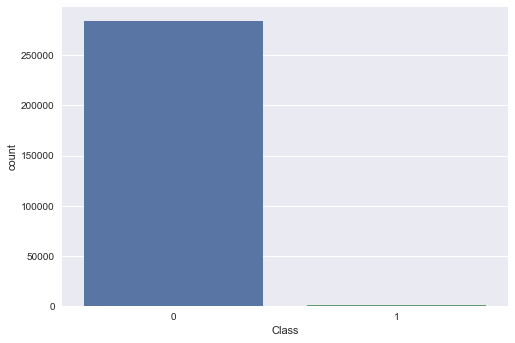

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
dt = pd.read_csv("creditcard.csv",header = 0)
sns.countplot("Class",data=dt)
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler
dt["nAmount"] = StandardScaler().fit_transform(dt['Amount'].values.reshape(-1, 1))
dt.drop(["Time","Amount"],axis=1,inplace=True)
dt.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,nAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [15]:
def model(model,features_train,features_test,labels_train,labels_test):
	clf = model
	clf.fit(features_train,labels_train.values.ravel())
	pred=clf.predict(features_test)
	cnf_matrix=confusion_matrix(labels_test,pred)
	print "The recall for this model is: %f"%(float(cnf_matrix[1,1])/(cnf_matrix[1,1]+
									 cnf_matrix[1,0]))
	fig= plt.figure(figsize=(6,3))
	print "TP: %d"%cnf_matrix[1,1,]
	print "TN: %d"%cnf_matrix[0,0] 
	print "FP: %d"%cnf_matrix[0,1]
	print "FN: %d"%cnf_matrix[1,0]
	sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
	plt.title("Confusion_matrix")
	plt.xlabel("Predicted_class")
	plt.ylabel("Real class")
	plt.show()
	print "\n----------Classification Report------------------------------------"
	print classification_report(labels_test,pred)
	
	''' You have to complete this function, ROC Curve is missing'''


In [16]:
from sklearn.model_selection import train_test_split
def data_prepration(x):
	x_features= x.iloc[:,x.columns != "Class"]
	x_labels=x.iloc[:,x.columns=="Class"]
	x_train,x_test,y_train,y_test=train_test_split(x_features,x_labels,test_size=0.3)
	print "Length of training data: %d"%len(x_train)
	print "Length of test data: %d"%len(x_test)
	return(x_train,x_test,y_train,y_test)

In [17]:
def undersample(data,times):
    fraud_indices= np.array(data[data.Class==1].index)
    normal_indices = np.array(data[data.Class==0].index)
    Count_Normal_transacation = len(data[data["Class"]==0])
    Count_Fraud_transacation = len(data[data["Class"]==1])
    Normal_indices_undersample = np.array(np.random.choice(normal_indices,
    (times*Count_Fraud_transacation),replace=False))
    undersample_data= np.concatenate([fraud_indices,Normal_indices_undersample])
    undersample_data = data.iloc[undersample_data,:]
    normal = (float(len(undersample_data[undersample_data.Class==0]))
    /len(undersample_data["Class"]))
    print "The normal transacation proportion is : %f"%normal
    fraud = (float(len(undersample_data[undersample_data.Class==1]))
    /len(undersample_data["Class"]))
    print "The fraud transacation proportion is : %f"%fraud
    print "Total number of record in resampled data is: %f"%len(undersample_data["Class"])
    return(undersample_data)

Length of training data: 199364
Length of test data: 85443
The undersample data for 1 proportion

The normal transacation proportion is : 0.500000
The fraud transacation proportion is : 0.500000
Total number of record in resampled data is: 686.000000

----------------------Validation Set------------------------

The model classification for 1 proportion

Length of training data: 480
Length of test data: 206
The recall for this model is: 0.950495
TP: 96
TN: 101
FP: 4
FN: 5


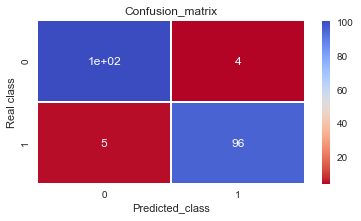


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.95      0.96      0.96       105
          1       0.96      0.95      0.96       101

avg / total       0.96      0.96      0.96       206

--------------------------Testing Set---------------------------
The recall for this model is: 0.932886
TP: 139
TN: 81101
FP: 4193
FN: 10


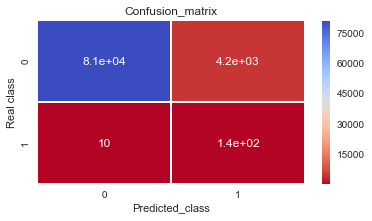


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.95      0.97     85294
          1       0.03      0.93      0.06       149

avg / total       1.00      0.95      0.97     85443

The undersample data for 2 proportion

The normal transacation proportion is : 0.666667
The fraud transacation proportion is : 0.333333
Total number of record in resampled data is: 1029.000000

----------------------Validation Set------------------------

The model classification for 2 proportion

Length of training data: 720
Length of test data: 309
The recall for this model is: 0.858491
TP: 91
TN: 200
FP: 3
FN: 15


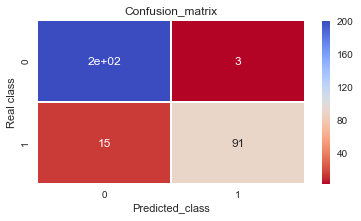


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.93      0.99      0.96       203
          1       0.97      0.86      0.91       106

avg / total       0.94      0.94      0.94       309

--------------------------Testing Set---------------------------
The recall for this model is: 0.892617
TP: 133
TN: 83031
FP: 2263
FN: 16


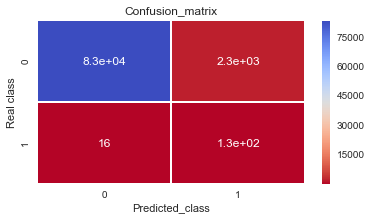


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.97      0.99     85294
          1       0.06      0.89      0.10       149

avg / total       1.00      0.97      0.98     85443

The undersample data for 3 proportion

The normal transacation proportion is : 0.750000
The fraud transacation proportion is : 0.250000
Total number of record in resampled data is: 1372.000000

----------------------Validation Set------------------------

The model classification for 3 proportion

Length of training data: 960
Length of test data: 412
The recall for this model is: 0.936937
TP: 104
TN: 296
FP: 5
FN: 7


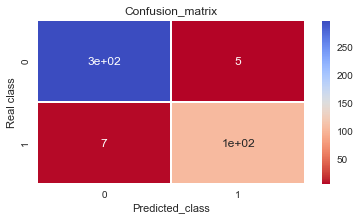


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.98      0.98      0.98       301
          1       0.95      0.94      0.95       111

avg / total       0.97      0.97      0.97       412

--------------------------Testing Set---------------------------
The recall for this model is: 0.899329
TP: 134
TN: 84066
FP: 1228
FN: 15


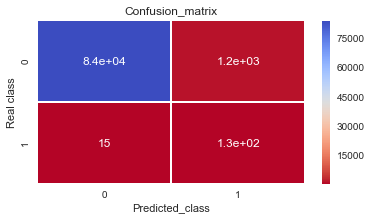


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     85294
          1       0.10      0.90      0.18       149

avg / total       1.00      0.99      0.99     85443



In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
x_tr,x_ts,y_tr,y_ts = data_prepration(dt)
x_tr["Class"] = y_tr["Class"]
x_tr = x_tr.reset_index(drop=True)
for i in range(1,4):
    print "The undersample data for " + str(i) + " proportion\n"
    Undersample_data = undersample(x_tr,i)
    print "\n----------------------Validation Set------------------------"
    print "\nThe model classification for " + str(i) + " proportion\n"
    under_x,under_xt,under_yx,under_yxt=data_prepration(Undersample_data)
    clf=LogisticRegression()
    model(clf,under_x,under_xt,under_yx,under_yxt)
    print "--------------------------Testing Set---------------------------"
    model(clf,under_x,x_ts,under_yx,y_ts)